In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_22.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_4.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_12.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_16.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_2.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_45.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_7.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_5.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_36.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_18.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_33.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_19.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_31.jpg
/kaggle/input/dog-breed-classification/Afgan Hound dog/Image_27.jpg
/kaggle/input/dog-breed-classification/Afgan Hound d

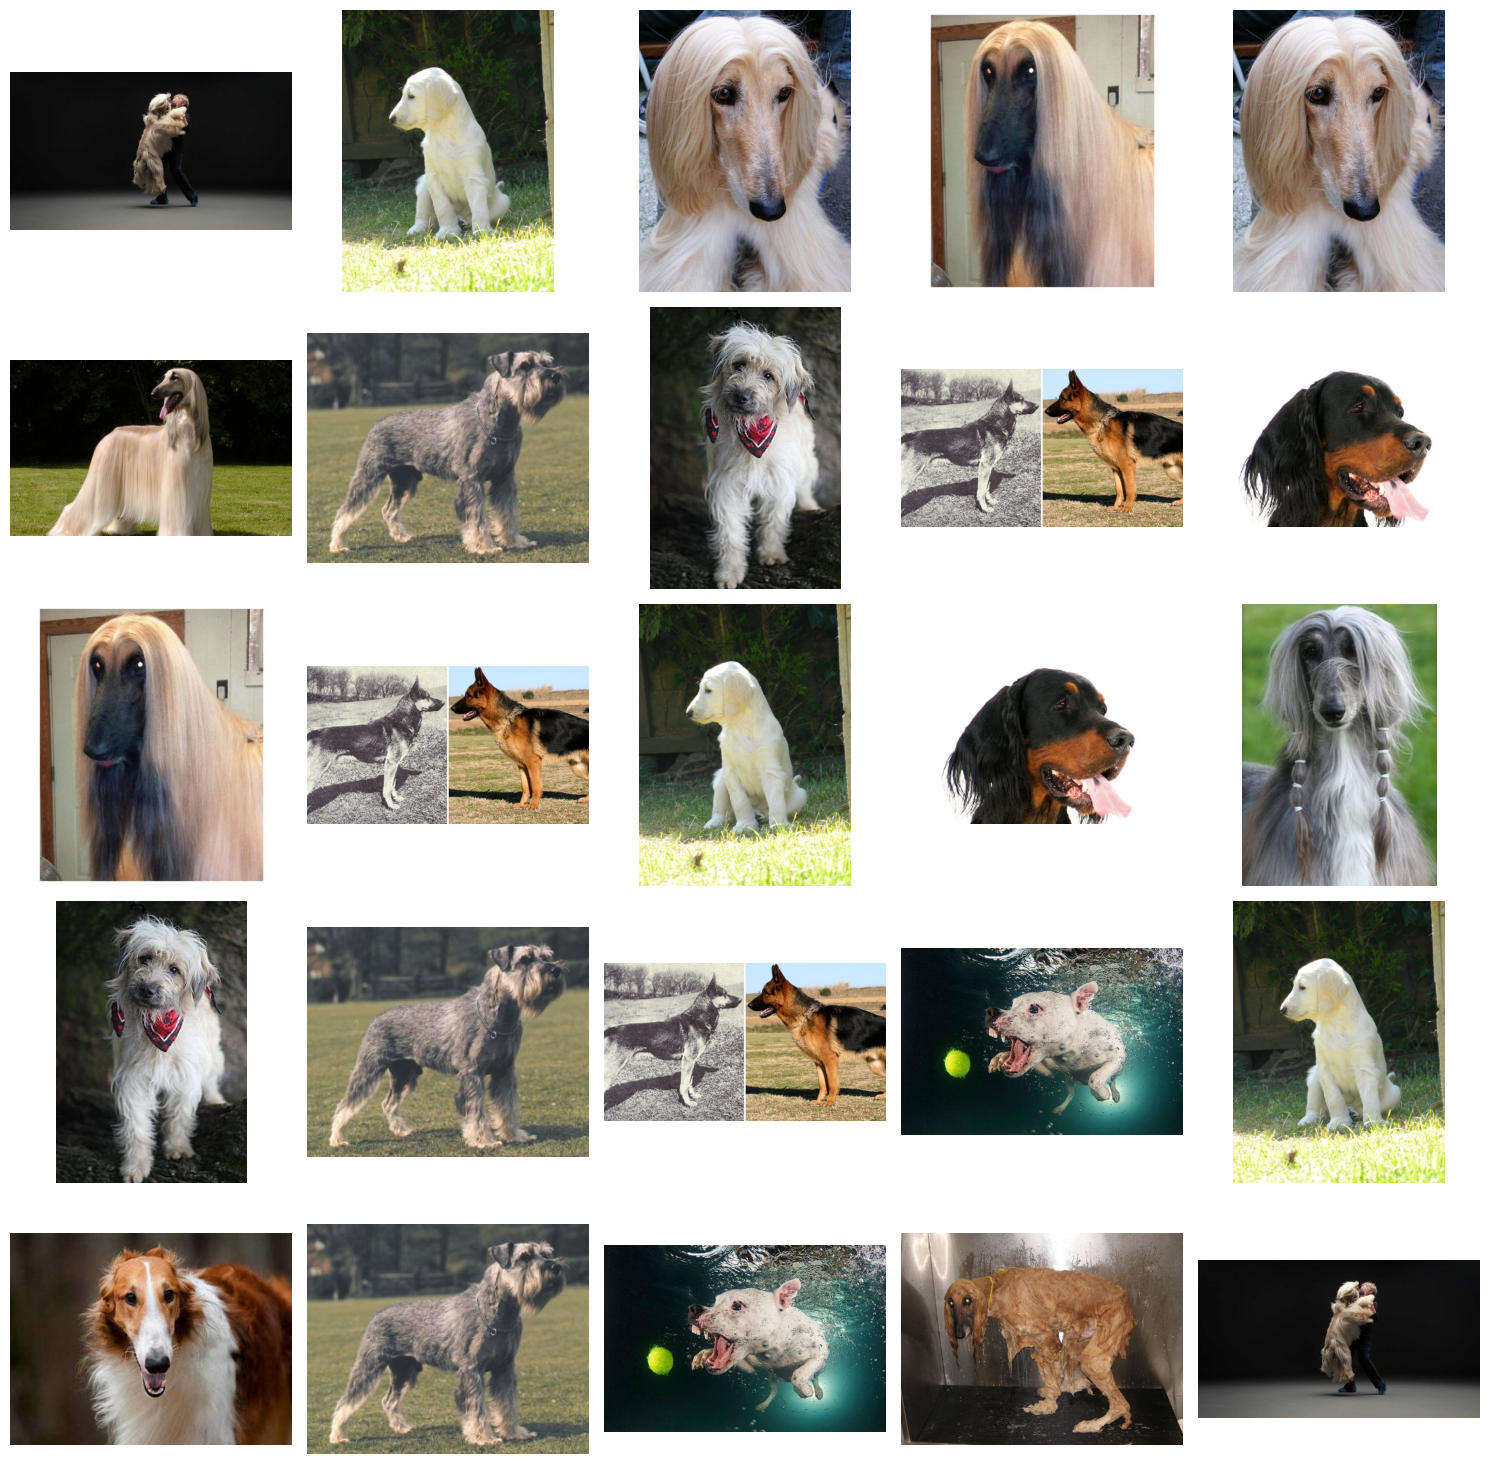

In [76]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the image folder
image_folder_path = '/kaggle/input/dog-breed-classification'

# Get the list of all subdirectories in the folder
subdirectories = [d for d in os.listdir(image_folder_path) if os.path.isdir(os.path.join(image_folder_path, d))]

# Create a figure to display the images
plt.figure(figsize=(15, 15))

# Counter for displaying images
count = 0

# Loop through the subdirectories and display the images
for subdir in subdirectories:
    subdir_path = os.path.join(image_folder_path, subdir)
    
    # List all image files in the subdirectory
    image_files = [f for f in os.listdir(subdir_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    
    # Display the first image from each subdirectory
    for image_file in image_files:
        image_path = os.path.join(subdir_path, image_file)
        try:
            img = Image.open(image_path)
            plt.subplot(5, 5, count + 1)  # Adjust rows and columns as needed
            plt.imshow(img)
            plt.axis('off')  # Turn off axis for better visualization
            count += 1
            if count >= 25:  # Limit the number of displayed images
                break
        except Exception as e:
            print(f"Could not open {image_file}: {e}")

    if count >= 25:
        break

plt.tight_layout()
plt.show()


In [78]:
import os

# Path to the dataset directory
dataset_path = '/kaggle/input/dog-breed-classification'

# List the contents of the dataset directory
dataset_contents = os.listdir(dataset_path)
print("Dataset contents:", dataset_contents)

# Check if there are subdirectories for images or any other data
for subdir in dataset_contents:
    subdir_path = os.path.join(dataset_path, subdir)
    if os.path.isdir(subdir_path):
        print(f"Contents of {subdir}: {os.listdir(subdir_path)}")


Dataset contents: ['Afgan Hound dog', 'Bulldog dog', 'Beagle dog', 'Borzoi dog', 'Bichon Frise dog', 'American Bulldog dog', 'Alaskan Malamute dog', 'Bocker dog', 'Affenhuahua dog', 'Bugg dog', 'Belgian Tervuren dog', 'Boxer dog', 'Auggie dog', 'Akita dog']
Contents of Afgan Hound dog: ['Image_22.jpg', 'Image_4.jpg', 'Image_12.jpg', 'Image_16.jpg', 'Image_2.jpg', 'Image_45.jpg', 'Image_7.jpg', 'Image_5.jpg', 'Image_36.jpg', 'Image_18.jpg', 'Image_33.jpg', 'Image_19.jpg', 'Image_31.jpg', 'Image_27.jpg', 'Image_11.jpg', 'Image_39.jpg', 'Image_26.jpg', 'Image_28.jpg', 'Image_44.jpg', 'Image_14.jpg', 'Image_48.jpg', 'Image_41.jpg', 'Image_10.jpg', 'Image_47.jpg', 'Image_30.jpg', 'Image_23.jpg', 'Image_34.jpg', 'Image_50.jpg', 'Image_32.jpg', 'Image_21.jpg', 'Image_25.jpg', 'Image_17.jpg', 'Image_15.jpg', 'Image_1.jpg', 'Image_13.jpg', 'Image_43.jpg', 'Image_40.jpg', 'Image_35.jpg', 'Image_42.jpg', 'Image_8.jpg', 'Image_38.jpg', 'Image_46.jpg', 'Image_49.jpg', 'Image_3.jpg', 'Image_20.jpg',

In [79]:
train_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int',
    shuffle=True
)


Found 697 files belonging to 14 classes.


In [82]:
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Path to the dataset directory
dataset_path = '/kaggle/input/dog-breed-classification'

# Load the dataset (assuming images are organized by breed in the directory)
train_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int',
    shuffle=True
)

# Get the class names (dog breeds)
class_names = train_dataset.class_names
print("Class names:", class_names)


Found 697 files belonging to 14 classes.
Class names: ['Affenhuahua dog', 'Afgan Hound dog', 'Akita dog', 'Alaskan Malamute dog', 'American Bulldog dog', 'Auggie dog', 'Beagle dog', 'Belgian Tervuren dog', 'Bichon Frise dog', 'Bocker dog', 'Borzoi dog', 'Boxer dog', 'Bugg dog', 'Bulldog dog']


In [83]:
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential([
    # Normalizing the pixel values (scaling between 0 and 1)
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    
    # Flattening the output from convolutional layers
    layers.Flatten(),
    
    # Fully connected (Dense) Layer
    layers.Dense(128, activation='relu'),
    
    # Output Layer: one node per dog breed (number of breeds = len(class_names))
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summarize the model architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,782 (56.61 MB)

 Trainable params: 14,840,782 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
# Load the dataset with a validation split
train_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int',
    shuffle=True,
    validation_split=0.2,  # 20% of the data will be used for validation
    subset="training",  # This will load the training data
    seed=123  # Set a seed for reproducibility
)

validation_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int',
    shuffle=True,
    validation_split=0.2,  # The same validation split
    subset="validation",  # This will load the validation data
    seed=123  # Ensure that the split is consistent
)

# Check the class names and ensure the datasets are loaded properly
print("Class names:", train_dataset.class_names)


Found 697 files belonging to 14 classes.
Using 558 files for training.
Found 697 files belonging to 14 classes.
Using 139 files for validation.
Class names: ['Affenhuahua dog', 'Afgan Hound dog', 'Akita dog', 'Alaskan Malamute dog', 'American Bulldog dog', 'Auggie dog', 'Beagle dog', 'Belgian Tervuren dog', 'Bichon Frise dog', 'Bocker dog', 'Borzoi dog', 'Boxer dog', 'Bugg dog', 'Bulldog dog']


In [93]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10  # Number of training epochs
)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.9756 - loss: 0.0605 - val_accuracy: 0.7050 - val_loss: 1.6529
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.9845 - loss: 0.0568 - val_accuracy: 0.7194 - val_loss: 1.6585
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.9893 - loss: 0.0363 - val_accuracy: 0.7194 - val_loss: 1.6733
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.9890 - loss: 0.0329 - val_accuracy: 0.7050 - val_loss: 1.6428
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.9862 - loss: 0.0495 - val_accuracy: 0.7194 - val_loss: 1.7461
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.9872 - loss: 0.0441 - val_accuracy: 0.7266 - val_loss: 1.7784
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.9856 - loss: 0.0550 - val_accuracy: 0.7122 - val_loss: 1.5805
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.9844 - loss: 0.0366 - val_accuracy: 0.

In [94]:
# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_dataset)
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7036 - loss: 1.7836
Validation Loss: 1.6796
Validation Accuracy: 0.7122


In [97]:
# Function to load and prepare an image
def load_and_prepare_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array / 255.0  # Normalize image

# Load and predict on a new image
image_path = '/kaggle/input/dog-breed-classification/Affenhuahua dog/Image_1.jpg'
img = load_and_prepare_image(image_path)

# Predict the breed
predictions = model.predict(img)
predicted_class = class_names[np.argmax(predictions)]
print(f"Predicted Dog Breed: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step
Predicted Dog Breed: Borzoi dog


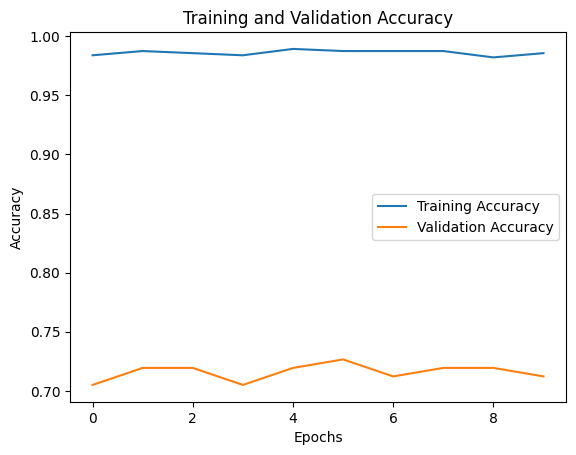

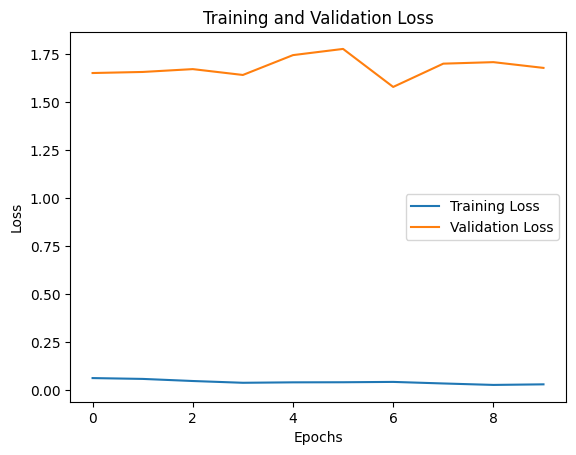

In [99]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [101]:
# Save the model
model.save('dog_breed_classifier.h5')

# To load the model again
# from tensorflow.keras.models import load_model
# model = load_model('dog_breed_classifier.h5')
